<p style="text-align: right">
  <img src="../images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 06 - PID controller homework

In this exercise you will have to write the code for a PID controller tasked to command the angular speed of your Duckiebot to compensate an initial tracking error of $0.2 \text{m}$. 

Your robot will have to rely on its own odometry to estimate its current position.

**Note**: the function(s) used to compute the odometry will be taken from your previous answers in the [odometry activity](../04-Odometry/odometry_activity.ipynb). Make sure you're happy about them, too!

The Duckiebot's speed is constant and given: $v_0 = 0.2$. 

May the duck be with you!

⚠️ ***WARNING:***
- DO NOT CHANGE THE NAME OF THE FOLLOWING FUNCTION
- DO NOT CHANGE THE ARGUMENTS OF THE FUNCTION
- DO NOT CREATE NEW CODE CELLS, THEY WILL NOT BE CONSIDERED

In [173]:
import numpy as np

# Lateral control

# TODO: write the PID controller using what you've learned in the previous activities

# Note: y_hat will be calculated based on your DeltaPhi() and poseEstimate() functions written previously 

def PIDController(
    v_0, # assume given (by the scenario)
    y_ref, # assume given (by the scenario)
    y_hat, # assume given (by the odometry)
    prev_e_y, # assume given (by the previous iteration of this function)
    prev_int_y, # assume given (by the previous iteration of this function)
    delta_t): # assume given (by the simulator)
    """
    Args:
        v_0 (:double:) linear Duckiebot speed.
        y_ref (:double:) reference lateral pose
        y_hat (:double:) the current estiamted pose along y.
        prev_e_y (:double:) tracking error at previous iteration.
        prev_int_y (:double:) previous integral error term.
        delta_t (:double:) time interval since last call.
    returns:
        v_0 (:double:) linear velocity of the Duckiebot 
        omega (:double:) angular velocity of the Duckiebot
        e_y (:double:) current tracking error (automatically becomes prev_e_y at next iteration).
        e_int_y (:double:) current integral error (automatically becomes prev_int_y at next iteration).
    """
    #tracking error
    e_y = abs(y_ref - y_hat)
    
    # integral of the error
    e_int_y = prev_int_y + e_y*delta_t
    
    # anti-windup - preventing the integral error from growing too much
    e_int_y = max(min(e_int_y,2),-2)
    
    # derivative of the error
    e_der_y = (e_y - prev_e_y)/delta_t
    
    # controller coefficients
    Kp = 2
    Ki = 0
    Kd = 1
    
    omega = Kp*e_y + Ki*e_int_y + Kd*e_der_y
    
    return [v_0, omega], e_y, e_int_y


### Sanity Check

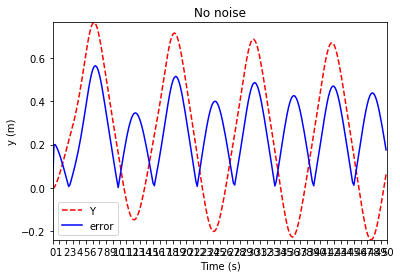

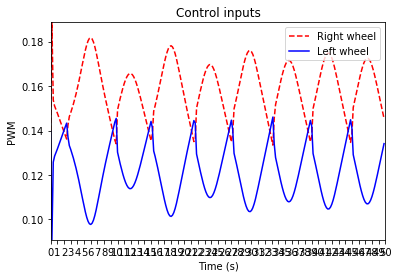

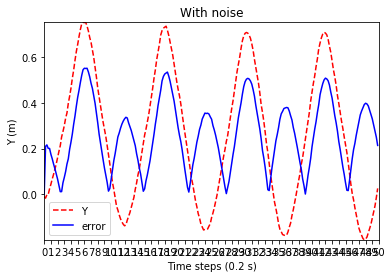

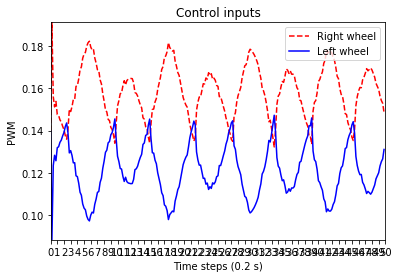

In [174]:
import sys
sys.path.append('../')
from unit_test import UnitTestPositionPID

# Write here the values of the kinematics parameters you calculated during the activities.
# This test will give you an idea of the behavior of the controller you wrote above.
# Try to play with the parameters, change R, the baseline all the PID variables,
# What change in the resulting graphs? Why?

R = 0.0318
baseline = 0.1
gain = 0.6
trim = 0.0
v_0 = 0.2
y_ref = 0.2

# unit test input R, baseline, v_0, gain, trim, PIDController
unit_test = UnitTestPositionPID(R, baseline, v_0, y_ref, gain, trim, PIDController) 
unit_test.test()


## Testing instructions and outcome examples

Here are some examples of stable outcomes (not necessarily the best you can get):

### 💻 Simulation 

1. Write the controller above, save this page (`Ctrl-S`), run:


        dts exercises test --sim


2. Click on the "PID Exercise" icon on the VNC desktop

3. Bring up the interaction panel (it might be hidden behind RVIZ, highlight it through the shortcut on the bottom bar of VNC) and type the desired reference position $y_{ref}$ (in **meters**) and Duckiebot linear speed ($v_0$). 

4. Press on `Send Commands` to start, `Stop` to stop. 

5. `Ctrl-C` on the computer terminal used to launch the simulator to close the instance. 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-sim-good.png" alt="pid-lateral-sim-1" style="width: 300px;"/>
  <figcaption> Simulation, lateral PID control. $v_{0} = 0.2$, $y_{ref} = [0.2, -0.1]$. </figcaption>
  </div>
</figure>

### 🚙 Duckiebot

0. Make sure your Duckiebot is powered on and connected to the network.

1. Write the controller above, save this page (`Ctrl-S`), run:


        dts exercises test -b ROBOTNAME


2. Click on the "PID Exercise" icon on the VNC desktop

3. Bring up the interaction panel (it might be hidden behind RVIZ, highlight it through the shortcut on the bottom bar of VNC) and type the desired reference position $y_{ref}$ (in **meters**) and Duckiebot linear speed ($v_0$). 

4. Press on `Send Commands` to start, `Stop` to stop. 

5. `Ctrl-C` on the computer terminal used to launch the simulator to close the instance. 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-real-good.png" alt="pid-lateral-real-1" style="width: 300px;"/>
  <figcaption> Duckiebot, lateral PID control. $v_{0} = 0.2$, $y_{ref} = [0.2, -0.2, 0.2]$. </figcaption>
  </div>
</figure>

# Local evaluation and remote submission of your homework exercise


⚠️ You must submit this homework for evaluation if you are pursuing a verified track in the MOOC, by following the `Remote evalutation` instructions below.⚠️ 

## Local evaluation

If you want (this is not necessary) you can evaluate your submission locally before shipping it to the cloud. This will provide you access to detailed performacne metrics of your controller on various episodes. Note that this will take a while to run (~30-60 minutes). 

1. Open a terminal, navigate to the exercise folder and run:


        dts challenges evaluate
        

2. The result of the simulation can be visualized in realtime at the link printed by the evaluator, for example:

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-exercise/screen-aido-eval.png" alt="pid-lateral-real-1" style="width: 900px;"/>
  <figcaption> Visualize the simulation at the link printed during the evaluation. </figcaption>
  </div>
</figure>

3. The evaluation output is saved locally at the end of the evaluation process. 

## Remote submission (⚠️ This part is mandatory to submit your homework and receive an official evaluation ⚠️)

You can submit your agent for evaluation by: 

1. Opening a terminal on your computer, navigating to the exercise folder and running:


        dts challenges submit
        

2. The result of the submission can be visualized on the AI-DO challenges website.

After some processing, you should see something like this:

```

~        ## Challenge mooc-modcon - MOOC - ModCon
~        
~                Track this submission at:
~        
~                    https://challenges.duckietown.org/v4/humans/submissions/SUBMISSION-NUMBER
~        
~                You can follow its fate using:
~        
~                    $ dts challenges follow --submission SUBMISSION-NUMBER
~        
~                You can speed up the evaluation using your own evaluator:
~        
~                    $ dts challenges evaluator --submission SUBMISSION-NUMBER
~        
~                For more information, see the manual at https://docs.duckietown.org/daffy/AIDO/out/
~        

```

Congratulations, you have completed the modeling and control activities! 